In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

# Wrangle Data

In [2]:
import wrangle

from wrangle import wrangle_zillow
from wrangle import split
from wrangle import seperate_y
from wrangle import scale_data

### Acquire

In [3]:
df = wrangle_zillow()

In [4]:
df.head()

,square_feet,bedrooms,bathrooms,tax_value,house_age
parcelid,,,,,
12177905,2376.0,4,3,145143.0,51
10887214,1312.0,3,3,119407.0,57
12095076,2962.0,4,3,773303.0,71
12069064,738.0,2,1,218552.0,99
12790562,3039.0,4,3,220583.0,51


In [5]:
df.shape

(58088, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58088 entries, 12177905 to 13083743
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   square_feet  58088 non-null  float64
 1   bedrooms     58088 non-null  int64  
 2   bathrooms    58088 non-null  int64  
 3   tax_value    58088 non-null  float64
 4   house_age    58088 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 2.7 MB


In [7]:
df.describe()

,square_feet,bedrooms,bathrooms,tax_value,house_age
count,58088.000000,58088.000000,58088.000000,5.808800e+04,58088.000000
mean,1592.589416,2.924150,2.108077,3.901672e+05,53.509296
std,612.744758,0.931132,0.770176,2.781329e+05,23.182622
min,152.000000,1.000000,1.000000,1.000000e+03,5.000000
25%,1144.000000,2.000000,2.000000,1.909848e+05,36.000000
50%,1465.000000,3.000000,2.000000,3.328755e+05,54.000000
75%,1921.000000,4.000000,3.000000,5.128345e+05,69.000000
max,3499.000000,9.000000,7.000000,1.679968e+06,143.000000


### Split

In [8]:
train, validate, test = split(df)

In [9]:
train.head()

,square_feet,bedrooms,bathrooms,tax_value,house_age
parcelid,,,,,
11201390,1898.0,3,2,69945.0,62
14125345,2164.0,4,3,294236.0,44
12621955,2184.0,4,3,565665.0,55
13026675,1532.0,3,3,383116.0,9
12395470,1478.0,3,2,416252.0,23


In [10]:
train.shape

(32529, 5)

In [11]:
validate.shape

(13941, 5)

In [12]:
test.shape

(11618, 5)

### Seperate Target 

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [14]:
X_train.shape

(32529, 4)

In [15]:
y_train.shape

(32529,)

In [16]:
X_validate.shape

(13941, 4)

In [17]:
y_validate.shape

(13941,)

In [18]:
X_test.shape

(11618, 4)

In [19]:
y_test.shape

(11618,)

### Scale data

In [20]:
train_scaled, validate_scaled, test_scaled = scale_data(X_train, X_validate, X_test)

In [21]:
X_train.head()

,square_feet,bedrooms,bathrooms,house_age
parcelid,,,,
11201390,1898.0,3,2,62
14125345,2164.0,4,3,44
12621955,2184.0,4,3,55
13026675,1532.0,3,3,9
12395470,1478.0,3,2,23


In [22]:
train_scaled.head()

,square_feet,bedrooms,bathrooms,house_age
0,0.490590,0.250,0.166667,0.413043
1,0.575439,0.375,0.333333,0.282609
2,0.581818,0.375,0.333333,0.362319
3,0.373844,0.250,0.333333,0.028986
4,0.356619,0.250,0.166667,0.130435


In [23]:
X_validate.head()

,square_feet,bedrooms,bathrooms,house_age
parcelid,,,,
12607830,1117.0,1,2,58
13859990,1386.0,3,2,49
11436076,1199.0,3,2,36
12655781,1517.0,3,2,31
10875142,1399.0,3,1,73


In [24]:
validate_scaled.head()

,square_feet,bedrooms,bathrooms,house_age
0,0.241467,0.00,0.166667,0.384058
1,0.327273,0.25,0.166667,0.318841
2,0.267624,0.25,0.166667,0.224638
3,0.369059,0.25,0.166667,0.188406
4,0.331419,0.25,0.000000,0.492754


In [25]:
X_test.head()

,square_feet,bedrooms,bathrooms,house_age
parcelid,,,,
11108242,1118.0,3,2,61
11617049,2445.0,2,3,32
12784869,1767.0,3,2,60
12892055,1037.0,2,2,32
17141638,2122.0,4,2,43


In [26]:
test_scaled.head()

,square_feet,bedrooms,bathrooms,house_age
0,0.241786,0.250,0.166667,0.405797
1,0.665072,0.125,0.333333,0.195652
2,0.448804,0.250,0.166667,0.398551
3,0.215949,0.125,0.166667,0.195652
4,0.562041,0.375,0.166667,0.275362


## Target Distribution

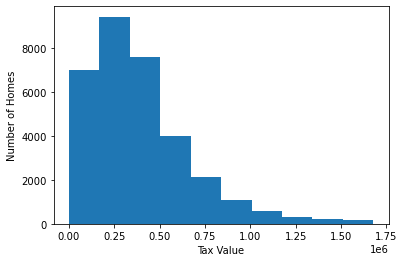

In [27]:
plt.hist(y_train)
plt.xlabel("Tax Value")
plt.ylabel("Number of Homes")
plt.show()

# Baseline

In [28]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [29]:
# 1. Predict tax_pred_mean
tax_pred_mean = y_train['tax_value'].mean()
y_train['tax_pred_mean'] = tax_pred_mean
y_validate['tax_pred_mean'] = tax_pred_mean

In [30]:
tax_pred_mean

389646.24448953243

In [31]:
# 2. compute tax_pred_median
tax_pred_median = y_train['tax_value'].median()
y_train['tax_pred_median'] = tax_pred_median
y_validate['tax_pred_median'] = tax_pred_median

In [32]:
tax_pred_median

332250.0

In [33]:
y_train.head()

,tax_value,tax_pred_mean,tax_pred_median
parcelid,,,
11201390,69945.0,389646.24449,332250.0
14125345,294236.0,389646.24449,332250.0
12621955,565665.0,389646.24449,332250.0
13026675,383116.0,389646.24449,332250.0
12395470,416252.0,389646.24449,332250.0


In [34]:
y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median
parcelid,,,
12607830,297087.0,389646.24449,332250.0
13859990,670065.0,389646.24449,332250.0
11436076,17032.0,389646.24449,332250.0
12655781,91415.0,389646.24449,332250.0
10875142,78238.0,389646.24449,332250.0


In [35]:
# find residuals

y_train['residual_mean'] = y_train['tax_pred_mean'] - y_train['tax_value']
y_train['residual_median'] = y_train['tax_pred_median'] - y_train['tax_value']

y_validate['residual_mean'] = y_validate['tax_pred_mean'] - y_validate['tax_value']
y_validate['residual_median'] = y_validate['tax_pred_median'] - y_validate['tax_value']

In [36]:
y_train.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median
parcelid,,,,,
11201390,69945.0,389646.24449,332250.0,319701.24449,262305.0
14125345,294236.0,389646.24449,332250.0,95410.24449,38014.0
12621955,565665.0,389646.24449,332250.0,-176018.75551,-233415.0
13026675,383116.0,389646.24449,332250.0,6530.24449,-50866.0
12395470,416252.0,389646.24449,332250.0,-26605.75551,-84002.0


In [37]:
y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median
parcelid,,,,,
12607830,297087.0,389646.24449,332250.0,92559.24449,35163.0
13859990,670065.0,389646.24449,332250.0,-280418.75551,-337815.0
11436076,17032.0,389646.24449,332250.0,372614.24449,315218.0
12655781,91415.0,389646.24449,332250.0,298231.24449,240835.0
10875142,78238.0,389646.24449,332250.0,311408.24449,254012.0


In [38]:
# square each residual value
y_train['residual_mean^2'] = y_train.residual_mean ** 2
y_train['residual_median^2'] = y_train.residual_median ** 2

y_validate['residual_mean^2'] = y_validate.residual_mean ** 2
y_validate['residual_median^2'] = y_validate.residual_median ** 2

y_train.head(3)

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2
parcelid,,,,,,,
11201390,69945.0,389646.24449,332250.0,319701.24449,262305.0,1.022089e+11,6.880391e+10
14125345,294236.0,389646.24449,332250.0,95410.24449,38014.0,9.103115e+09,1.445064e+09
12621955,565665.0,389646.24449,332250.0,-176018.75551,-233415.0,3.098260e+10,5.448256e+10


In [39]:
y_validate.head(3)

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2
parcelid,,,,,,,
12607830,297087.0,389646.24449,332250.0,92559.24449,35163.0,8.567214e+09,1.236437e+09
13859990,670065.0,389646.24449,332250.0,-280418.75551,-337815.0,7.863468e+10,1.141190e+11
11436076,17032.0,389646.24449,332250.0,372614.24449,315218.0,1.388414e+11,9.936239e+10


In [40]:
# SSE
SSE_mean = sum(y_train['residual_mean^2'])
SSE_median = sum(y_train['residual_median^2'])

print("SSE of Mean (Train) = ", SSE_mean)
print("SSE of Median (Train) = ", SSE_median)

SSE of Mean (Train) =  2499736094512953.5
SSE of Median (Train) =  2606897318699333.0


In [41]:
# SSE
SSE_mean_v = sum(y_validate['residual_mean^2'])
SSE_median_v = sum(y_validate['residual_median^2'])

print("SSE of Mean (Validate) = ", SSE_mean_v)
print("SSE of Median (Validate) = ", SSE_median_v)

SSE of Mean (Validate) =  1096726219873894.0
SSE of Median (Validate) =  1147125900705834.0


In [42]:
MSE_mean = SSE_mean/len(y_train)
MSE_median = SSE_median/len(y_train)

print("MSE_mean (Train) = ", MSE_mean)
print("MSE_median (Train) = ", MSE_median)

MSE_mean (Train) =  76846386132.7724
MSE_median (Train) =  80140715014.27443


In [43]:
MSE_mean_v = SSE_mean_v/len(y_train)
MSE_median_v = SSE_median_v/len(y_train)

print("MSE_mean (Validate)= ", MSE_mean_v)
print("MSE_median (Validate)= ", MSE_median_v)

MSE_mean (Validate)=  33715337694.792156
MSE_median (Validate)=  35264714584.08909


In [44]:
from math import sqrt
RMSE_mean = sqrt(MSE_mean)
RMSE_median = sqrt(MSE_median)

print("RMSE_mean (Train) = ", RMSE_mean)
print("RMSE_median (Train) = ", RMSE_median)

RMSE_mean (Train) =  277211.8073473286
RMSE_median (Train) =  283091.3545382028


In [45]:
RMSE_mean_v = sqrt(MSE_mean_v)
RMSE_median_v = sqrt(MSE_median_v)

print("RMSE_mean (Validate) = ", RMSE_mean_v)
print("RMSE_median (Validate) = ", RMSE_median_v)

RMSE_mean (Validate) =  183617.36762842495
RMSE_median (Validate) =  187789.0161433546


# LinearRegression (OLS)

In [46]:
# create the model object
lm = LinearRegression(normalize=True)

In [47]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(train_scaled, y_train.tax_value)

LinearRegression(normalize=True)

In [48]:
# predict train
y_train['tax_pred_lm'] = lm.predict(train_scaled)

In [49]:
y_train.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm
parcelid,,,,,,,,
11201390,69945.0,389646.24449,332250.0,319701.24449,262305.0,1.022089e+11,6.880391e+10,457313.923908
14125345,294236.0,389646.24449,332250.0,95410.24449,38014.0,9.103115e+09,1.445064e+09,492994.648074
12621955,565665.0,389646.24449,332250.0,-176018.75551,-233415.0,3.098260e+10,5.448256e+10,501237.847363
13026675,383116.0,389646.24449,332250.0,6530.24449,-50866.0,4.264409e+07,2.587350e+09,393505.732470
12395470,416252.0,389646.24449,332250.0,-26605.75551,-84002.0,7.078662e+08,7.056336e+09,342128.081736


In [50]:
# evaluate: rmse
rmse_train_lm = sqrt(mean_squared_error(y_train.tax_value, y_train.tax_pred_lm))

rmse_train_lm

239658.81740285383

In [51]:
# predict validate
y_validate['tax_pred_lm'] = lm.predict(validate_scaled)

y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm
parcelid,,,,,,,,
12607830,297087.0,389646.24449,332250.0,92559.24449,35163.0,8.567214e+09,1.236437e+09,397180.209126
13859990,670065.0,389646.24449,332250.0,-280418.75551,-337815.0,7.863468e+10,1.141190e+11,327317.567436
11436076,17032.0,389646.24449,332250.0,372614.24449,315218.0,1.388414e+11,9.936239e+10,277349.032519
12655781,91415.0,389646.24449,332250.0,298231.24449,240835.0,8.894188e+10,5.800150e+10,354144.809611
10875142,78238.0,389646.24449,332250.0,311408.24449,254012.0,9.697509e+10,6.452210e+10,295454.696526


In [52]:
# evaluate: rmse
rmse_validate_lm = sqrt(mean_squared_error(y_validate.tax_value, y_validate.tax_pred_lm))

rmse_validate_lm

245632.99167847406

In [53]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_lm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

RMSE for OLS using LinearRegression
Training/In-Sample:  239658.81740285383 
Validation/Out-of-Sample:  245632.99167847406


# LassoLars

In [54]:
# create the model object
lars = LassoLars(alpha=1.0)

In [55]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(train_scaled, y_train.tax_value)

LassoLars()

In [56]:
# predict train
y_train['tax_pred_lars'] = lars.predict(train_scaled)

y_train.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars
parcelid,,,,,,,,,
11201390,69945.0,389646.24449,332250.0,319701.24449,262305.0,1.022089e+11,6.880391e+10,457313.923908,457037.282865
14125345,294236.0,389646.24449,332250.0,95410.24449,38014.0,9.103115e+09,1.445064e+09,492994.648074,493058.524901
12621955,565665.0,389646.24449,332250.0,-176018.75551,-233415.0,3.098260e+10,5.448256e+10,501237.847363,501091.931318
13026675,383116.0,389646.24449,332250.0,6530.24449,-50866.0,4.264409e+07,2.587350e+09,393505.732470,393972.133705
12395470,416252.0,389646.24449,332250.0,-26605.75551,-84002.0,7.078662e+08,7.056336e+09,342128.081736,342860.358411


In [57]:
# evaluate: rmse
rmse_train_lars = sqrt(mean_squared_error(y_train.tax_value, y_train.tax_pred_lars))

rmse_train_lars

239659.52858695143

In [59]:
# predict validate
y_validate['tax_pred_lars'] = lars.predict(validate_scaled)

y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars
parcelid,,,,,,,,,
12607830,297087.0,389646.24449,332250.0,92559.24449,35163.0,8.567214e+09,1.236437e+09,397180.209126,396174.190201
13859990,670065.0,389646.24449,332250.0,-280418.75551,-337815.0,7.863468e+10,1.141190e+11,327317.567436,327659.736546
11436076,17032.0,389646.24449,332250.0,372614.24449,315218.0,1.388414e+11,9.936239e+10,277349.032519,278063.200275
12655781,91415.0,389646.24449,332250.0,298231.24449,240835.0,8.894188e+10,5.800150e+10,354144.809611,354705.938379
10875142,78238.0,389646.24449,332250.0,311408.24449,254012.0,9.697509e+10,6.452210e+10,295454.696526,295834.946777


In [60]:
# evaluate: rmse
rmse_validate_lars = sqrt(mean_squared_error(y_validate.tax_value, y_validate.tax_pred_lars))

rmse_validate_lars

245635.8013209567

In [62]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  239659.52858695143 
Validation/Out-of-Sample:  245635.8013209567


# TweedieRegressor (GLM)

In [63]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

In [64]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(train_scaled, y_train.tax_value)

TweedieRegressor(alpha=0, power=1)

In [65]:
# predict train
y_train['tax_pred_glm'] = glm.predict(train_scaled)

y_train.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars,tax_pred_glm
parcelid,,,,,,,,,,
11201390,69945.0,389646.24449,332250.0,319701.24449,262305.0,1.022089e+11,6.880391e+10,457313.923908,457037.282865,424711.562491
14125345,294236.0,389646.24449,332250.0,95410.24449,38014.0,9.103115e+09,1.445064e+09,492994.648074,493058.524901,470683.257206
12621955,565665.0,389646.24449,332250.0,-176018.75551,-233415.0,3.098260e+10,5.448256e+10,501237.847363,501091.931318,477849.714032
13026675,383116.0,389646.24449,332250.0,6530.24449,-50866.0,4.264409e+07,2.587350e+09,393505.732470,393972.133705,384180.979049
12395470,416252.0,389646.24449,332250.0,-26605.75551,-84002.0,7.078662e+08,7.056336e+09,342128.081736,342860.358411,335327.321210


In [66]:
# evaluate: rmse
rmse_train_glm = sqrt(mean_squared_error(y_train.tax_value, y_train.tax_pred_glm))

rmse_train_glm

240676.28435966163

In [67]:
# predict validate
y_validate['tax_pred_glm'] = glm.predict(validate_scaled)

y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars,tax_pred_glm
parcelid,,,,,,,,,,
12607830,297087.0,389646.24449,332250.0,92559.24449,35163.0,8.567214e+09,1.236437e+09,397180.209126,396174.190201,374630.827477
13859990,670065.0,389646.24449,332250.0,-280418.75551,-337815.0,7.863468e+10,1.141190e+11,327317.567436,327659.736546,323087.407355
11436076,17032.0,389646.24449,332250.0,372614.24449,315218.0,1.388414e+11,9.936239e+10,277349.032519,278063.200275,291358.221301
12655781,91415.0,389646.24449,332250.0,298231.24449,240835.0,8.894188e+10,5.800150e+10,354144.809611,354705.938379,343400.486000
10875142,78238.0,389646.24449,332250.0,311408.24449,254012.0,9.697509e+10,6.452210e+10,295454.696526,295834.946777,293303.191304


In [68]:
# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.tax_value, y_validate.tax_pred_glm)**(1/2)

rmse_validate_glm

246422.52587515122

In [69]:
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train_glm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  240676.28435966163 
Validation/Out-of-Sample:  246422.52587515122


# Polynomial Regression

### PolynomialFeatures

In [70]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

In [71]:
# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(train_scaled)

In [72]:
# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(validate_scaled)
X_test_degree2 = pf.transform(test_scaled)

### LinearRegression

In [73]:
# create the model object
lm2 = LinearRegression(normalize=True)

In [74]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

LinearRegression(normalize=True)

In [75]:
# predict train
y_train['tax_pred_lm2'] = lm2.predict(X_train_degree2)

y_train.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars,tax_pred_glm,tax_pred_lm2
parcelid,,,,,,,,,,,
11201390,69945.0,389646.24449,332250.0,319701.24449,262305.0,1.022089e+11,6.880391e+10,457313.923908,457037.282865,424711.562491,431670.924066
14125345,294236.0,389646.24449,332250.0,95410.24449,38014.0,9.103115e+09,1.445064e+09,492994.648074,493058.524901,470683.257206,470254.733214
12621955,565665.0,389646.24449,332250.0,-176018.75551,-233415.0,3.098260e+10,5.448256e+10,501237.847363,501091.931318,477849.714032,481370.883479
13026675,383116.0,389646.24449,332250.0,6530.24449,-50866.0,4.264409e+07,2.587350e+09,393505.732470,393972.133705,384180.979049,413834.464235
12395470,416252.0,389646.24449,332250.0,-26605.75551,-84002.0,7.078662e+08,7.056336e+09,342128.081736,342860.358411,335327.321210,365100.934077


In [76]:
# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.tax_value, y_train.tax_pred_lm2)**(1/2)

rmse_train_lm2

237643.60483755035

In [77]:
# predict validate
y_validate['tax_pred_lm2'] = lm2.predict(X_validate_degree2)

y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars,tax_pred_glm,tax_pred_lm2
parcelid,,,,,,,,,,,
12607830,297087.0,389646.24449,332250.0,92559.24449,35163.0,8.567214e+09,1.236437e+09,397180.209126,396174.190201,374630.827477,369339.848803
13859990,670065.0,389646.24449,332250.0,-280418.75551,-337815.0,7.863468e+10,1.141190e+11,327317.567436,327659.736546,323087.407355,309929.569946
11436076,17032.0,389646.24449,332250.0,372614.24449,315218.0,1.388414e+11,9.936239e+10,277349.032519,278063.200275,291358.221301,265281.565844
12655781,91415.0,389646.24449,332250.0,298231.24449,240835.0,8.894188e+10,5.800150e+10,354144.809611,354705.938379,343400.486000,360929.718110
10875142,78238.0,389646.24449,332250.0,311408.24449,254012.0,9.697509e+10,6.452210e+10,295454.696526,295834.946777,293303.191304,306433.268042


In [78]:
# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.tax_value, y_validate.tax_pred_lm2)**(1/2)

rmse_validate_lm2

244384.2941999235

In [79]:
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_lm2, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm2)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  237643.60483755035 
Validation/Out-of-Sample:  244384.2941999235


# Evaluate

### Plotting Actual vs. Predicted Values

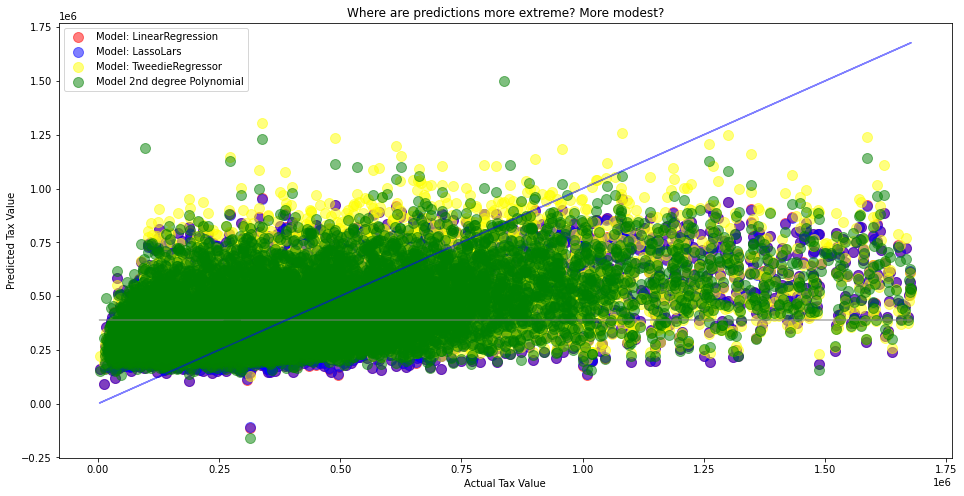

In [105]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.tax_pred_mean, alpha=.5, color="gray", label='_nolegend_')

plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')


plt.scatter(y_validate.tax_value, y_validate.tax_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lars, 
            alpha=.5, color="blue", s=100, label="Model: LassoLars")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")

plt.show()

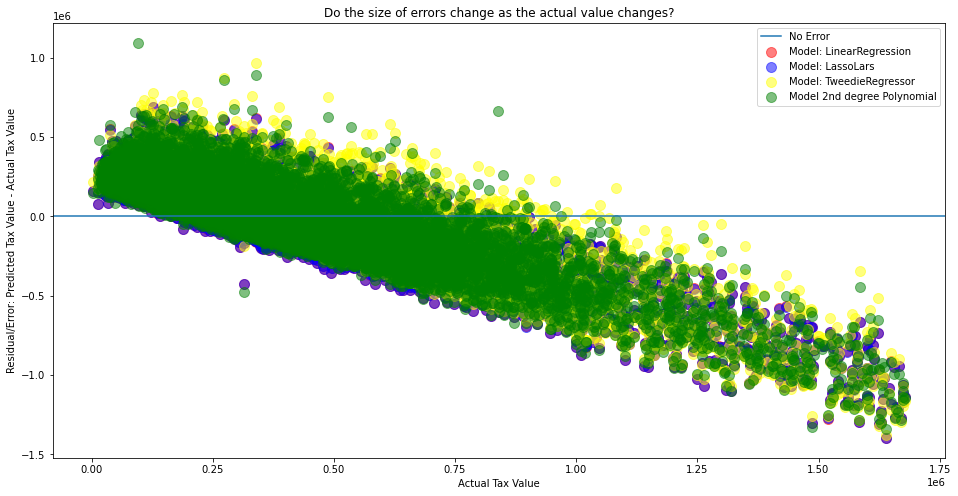

In [81]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lm-y_validate.tax_value, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lars-y_validate.tax_value, 
            alpha=.5, color="blue", s=100, label="Model: LassoLars")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_glm-y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lm2-y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

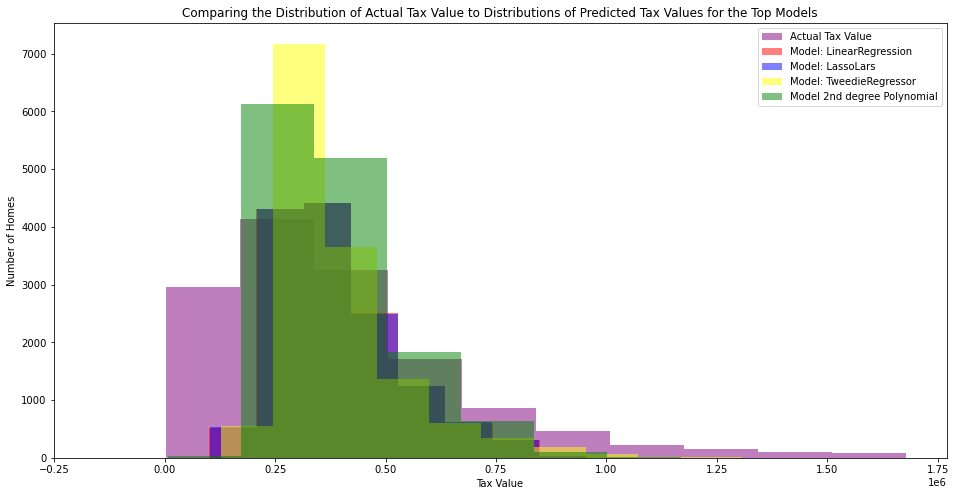

In [82]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='purple', alpha=.5, label="Actual Tax Value")
plt.hist(y_validate.tax_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.tax_pred_lars, color='blue', alpha=.5, label="Model: LassoLars")
plt.hist(y_validate.tax_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.tax_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Tax Value")
plt.ylabel("Number of Homes")
plt.title("Comparing the Distribution of Actual Tax Value to Distributions of Predicted Tax Values for the Top Models")
plt.legend()
plt.show()

In [83]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_lm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

print('------------------------------------------------------------------------------------')

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

print('------------------------------------------------------------------------------------')

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train_glm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)

print('------------------------------------------------------------------------------------')

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_lm2, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm2)

RMSE for OLS using LinearRegression
Training/In-Sample:  239658.81740285383 
Validation/Out-of-Sample:  245632.99167847406
------------------------------------------------------------------------------------
RMSE for Lasso + Lars
Training/In-Sample:  239659.52858695143 
Validation/Out-of-Sample:  245635.8013209567
------------------------------------------------------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  240676.28435966163 
Validation/Out-of-Sample:  246422.52587515122
------------------------------------------------------------------------------------
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  237643.60483755035 
Validation/Out-of-Sample:  244384.2941999235


In [84]:
## the polynomial model appears to do marginally better than all the other models

# Test Best Model

In [85]:
## make y test a dataframe

y_test = pd.DataFrame(y_test)

In [86]:
# predict on test
y_test['tax_pred_lm2'] = lm2.predict(X_test_degree2)

In [87]:
y_test.head()

,tax_value,tax_pred_lm2
parcelid,,
11108242,49243.0,246122.744037
11617049,1379880.0,746952.671603
12784869,388862.0,402492.209631
12892055,146850.0,294492.505765
17141638,665000.0,428072.947395


In [88]:

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_pred_lm2)**(1/2)

In [89]:
print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  240880.65771698716


In [90]:
print("RMSE_mean (Train) = ", RMSE_mean)
print("RMSE_median (Train) = ", RMSE_median)

RMSE_mean (Train) =  277211.8073473286
RMSE_median (Train) =  283091.3545382028


In [91]:
## My final model did a little better than the baseline model on the final test data 

# Feature Engineering

### SelectKBest

In [92]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 3 features
f_selector = SelectKBest(f_regression, k=3)

In [93]:
# find the top 3 X's correlated with y
f_selector.fit(train_scaled, y_train.tax_value)

SelectKBest(k=3, score_func=<function f_regression at 0x7ffe3fcdbdc0>)

In [94]:
# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

In [95]:
# get list of top K features. 
f_feature = train_scaled.iloc[:,feature_mask].columns.tolist()

f_feature

['square_feet', 'bedrooms', 'bathrooms']

### Recursive Feature Elimination

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [97]:
# initialize the ML algorithm
lm = LinearRegression()

In [98]:
# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, 3)

In [99]:
# fit the data using RFE
rfe.fit(train_scaled,y_train)  

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [100]:
# get the mask of the columns selected
feature_mask = rfe.support_

In [101]:
# get list of the column names. 
rfe_feature = train_scaled.iloc[:,feature_mask].columns.tolist()

rfe_feature

['square_feet', 'bedrooms', 'house_age']

In [102]:
# view list of columns and their ranking

# get the ranks
var_ranks = rfe.ranking_
# get the variable names
var_names = train_scaled.columns.tolist()
# combine ranks and names into a df for clean viewing
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
# sort the df by rank
rfe_ranks_df.sort_values('Rank')

,Var,Rank
0,square_feet,1
1,bedrooms,1
3,house_age,1
2,bathrooms,2


In [103]:
## bedrooms and bathrooms showed up on both SelectKBest and RFE

In [104]:
## fips and lot size never showed up on either, they will be removed